In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.metrics import accuracy_score

In [15]:
df=pd.read_csv("Cust_Spend_Data.csv")

In [16]:
df.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
Cust_ID            10 non-null int64
Name               10 non-null object
Avg_Mthly_Spend    10 non-null int64
No_Of_Visits       10 non-null int64
Apparel_Items      10 non-null int64
FnV_Items          10 non-null int64
Staples_Items      10 non-null int64
dtypes: int64(6), object(1)
memory usage: 640.0+ bytes


In [18]:
df.describe()

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
count,10.00000,10.000000,10.000000,10.000000,10.0000,10.00000
mean,5.50000,4850.000000,4.000000,0.300000,4.3000,4.00000
std,3.02765,2877.595447,1.699673,0.483046,4.6916,3.05505
min,1.00000,1000.000000,2.000000,0.000000,1.0000,0.00000
25%,3.25000,2500.000000,3.000000,0.000000,1.0000,2.00000
50%,5.50000,5000.000000,3.500000,0.000000,1.5000,3.50000
75%,7.75000,6875.000000,5.000000,0.750000,8.2500,6.25000
max,10.00000,10000.000000,7.000000,1.000000,12.0000,9.00000


In [20]:
dff=df.drop(columns=['Cust_ID', 'Name'])

In [21]:
dff.shape

(10, 5)

In [22]:
from scipy.stats import zscore

In [24]:
dffscaled=dff.apply(zscore)

In [26]:
from scipy.spatial.distance import pdist, squareform

In [27]:
d_euc=pdist(dffscaled,metric="euclidean")

In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [34]:
clus1=linkage(d_euc, method='average')

In [35]:
import matplotlib.pyplot as plt

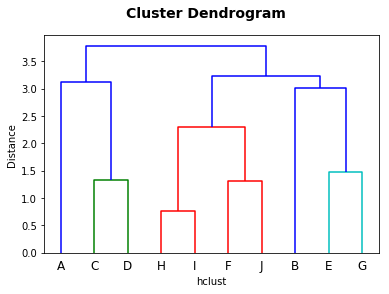

In [41]:
dendrogram(clus1, labels=df['Name'].values.tolist())
plt.xlabel('hclust')
plt.ylabel('Distance')
plt.suptitle('Cluster Dendrogram',fontweight='bold',fontsize=14);